In [7]:
from gdsctools import elastic_net
reload(elastic_net)
%pylab inline
rcParams['figure.figsize'] = 10,5

Populating the interactive namespace from numpy and matplotlib


In [2]:
from gdsctools import IC50, gdsctools_data, GenomicFeatures

In [3]:
ic50 = IC50(gdsctools_data("IC50_v5.csv.gz"))

In [4]:
gf = GenomicFeatures(gdsctools_data("genomic_features_v5.csv.gz"))

In [5]:
gd = elastic_net.ElasticNet(ic50, gf)

TISSUE FACTOR : NOT included
MEDIA FACTOR : NOT included
MSI FACTOR : NOT included
FEATURE FACTOR : included


ElasticNet requires 2 parameters called alpha and l1_ratio
note that this is different from glmnet terminology


| sklearn  |  glmnet |
|-----------------------
|l1_ratio  | alpha|
|alpha     | lambda|




elatic_net takes the drugname as input + 11_ratio set to 0.5 by dfault and an alpha parameter. If we naively try 0.01 for alpha, we get a set of scores and plot showing the predicted versus test sets

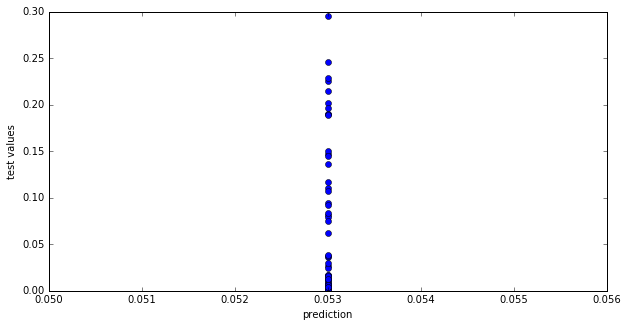

In [8]:

scores = gd.elastic_net("1047", alpha=0.1, n_folds=10, plot=True)

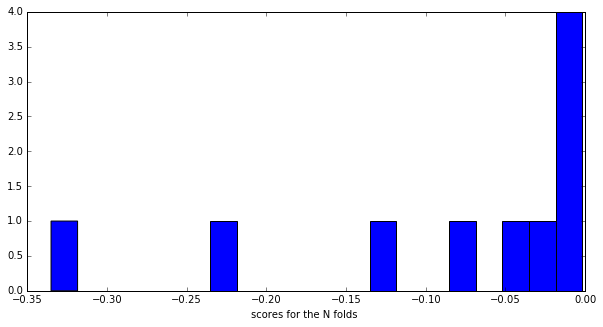

In [9]:
_ = hist(scores,bins=20); xlabel('scores for the N folds ')

We see here that scores are pretty bad (zero or even less)

If we try another value (0.01), we get better results

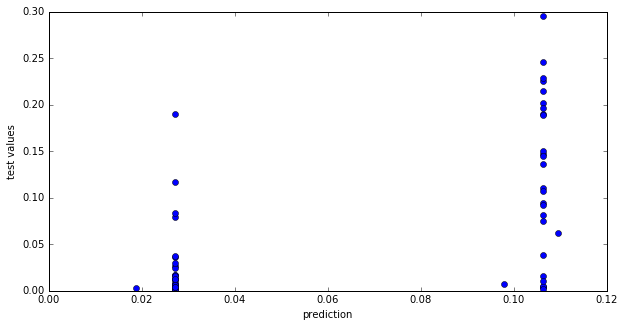

In [10]:
scores = gd.elastic_net("1047", alpha=0.01, n_folds=10, plot=True)

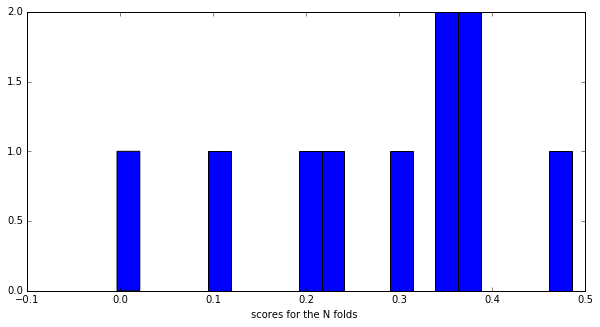

In [11]:
_ = hist(scores,bins=20); xlabel('scores for the N folds ')

Now the question is how to get the alpha value?

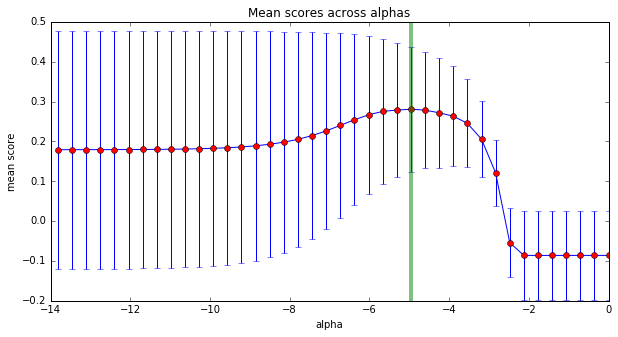

In [12]:
alphas, all_scores, maximum, alpha_best = gd.tune_alpha("1047", alphas=logspace(-6,0,40), n_folds=10)

In [13]:
alpha_best

0.0070170382867038297

In [14]:
log(alpha_best)

-4.9594140464487131

This is not instateneous but can be speed up by preventing the plotting, or playing on the number of alphas or the number of N_folds

In [15]:
res = gd.tune_alpha("1047", alphas=logspace(-6,0,40), n_folds=10, plot=False)

In [16]:
res = gd.tune_alpha("1047", alphas=logspace(-6,0,20), n_folds=4, plot=False)


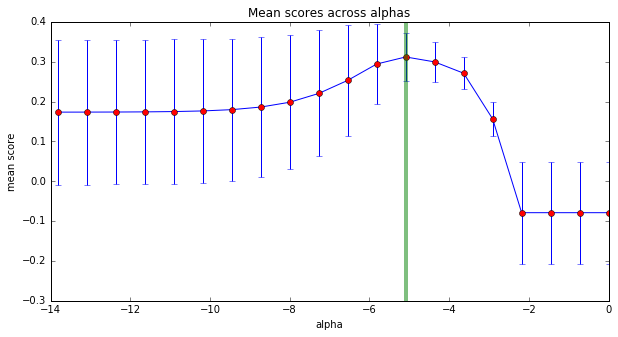

In [17]:
alphas, all_scores, maximum, best_alpha = gd.tune_alpha("1047", alphas=logspace(-6,0,20), n_folds=4, plot=True)


Using only 4 folds and 20 alphas decrease the computing time to 286ms instead of 1.34s

Another method to identify the best alpha is to use the method based on concordance index. Although it is much longer to compute, it may be interesting for further detailled analysis

 [-----------------95%----------------  ] 19 of 20 complete in 40.9 sec

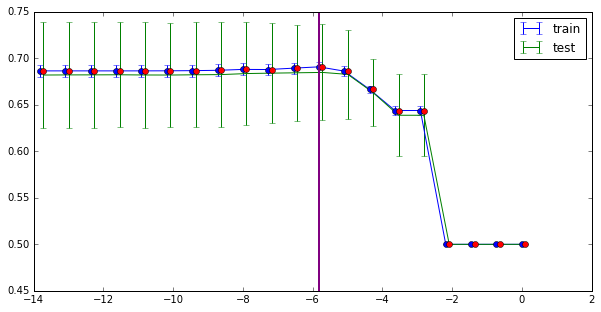

In [18]:
CI_best_alpha = gd.plot_cindex("1047", pylab.logspace(-6,0,20))

In [19]:
log(CI_best_alpha)

-5.8170570770375898

This is much longer that tuning_alpha method. The other point is that the 2 values
found differe slightly from -4.9 to -5.8 In this case, the CI values 
from -14 to -6 are pretty flat and may not be so precise as compare to the other
method.


Coming back on the previous value of 0.000701, let re-run the elastic net with this value:

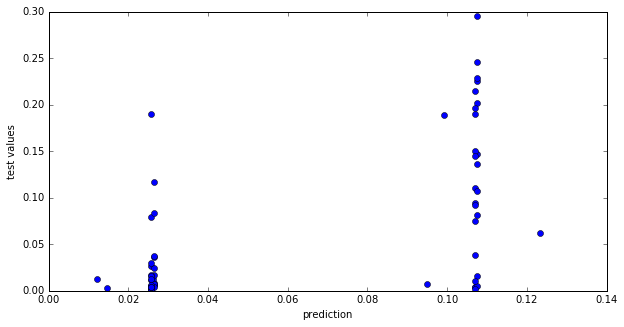

In [20]:
scores = gd.elastic_net("1047", alpha=0.00701,n_folds=10, plot=True)

We can also now look at the weights for that model:
    

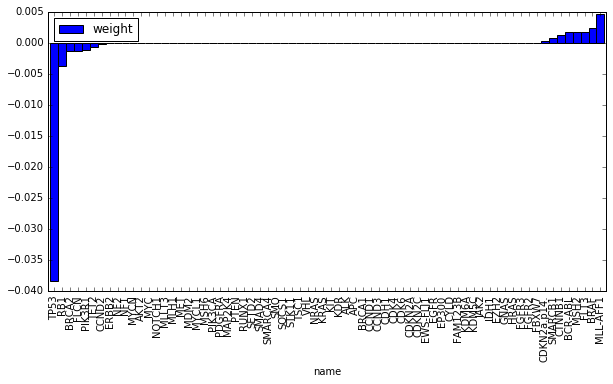

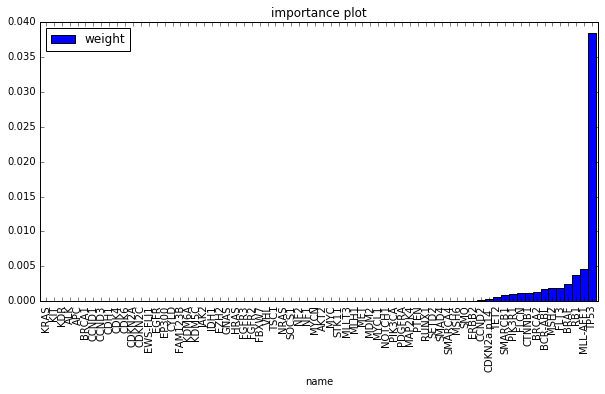

In [21]:
weights = gd.plot_weight("1047", alpha=0.00701)

In [22]:
# Here are the largest weigths (in absolute value)
weights.tail()

,weight
name,
FLT3,0.001882
BRAF,0.002425
RB1,0.003756
MLL-AFF1,0.004628
TP53,0.038432


In [23]:
drugs = gd.ic50.drugIds

In [24]:
res = gd.tune_alpha(drugs[0], alphas=logspace(-6,0,20), n_folds=4, plot=False)
res[3]

0.012742749857031322